# Global Alignment with gap penalty  
First import libraries   

In [1]:
import numpy as np
import matplotlib.pyplot as plt



Define possible amino acid letters

In [2]:
aa=" alanine - ala - A (gif, interactive);arginine - arg - R (gif, interactive);asparagine - asn - N (gif, interactive);"
aa+="aspartic acid - asp - D (gif, interactive);cysteine - cys - C (gif, interactive);glutamine - gln - Q (gif, interactive);"
aa+="glutamic acid - glu - E (gif, interactive);glycine - gly - G (gif, interactive);histidine - his - H (gif, interactive);"
aa+="isoleucine - ile - I (gif, interactive);leucine - leu - L (gif, interactive);lysine - lys - K (gif, interactive);"
aa+="methionine - met - M (gif, interactive);phenylalanine - phe - F (gif, interactive);proline - pro - P (gif, interactive);"
aa+="serine - ser - S (gif, interactive);threonine - thr - T (gif, interactive);tryptophan - trp - W (gif, interactive);"
aa+="tyrosine - tyr - Y (gif, interactive);valine - val - V (gif, interactive)"

aas = [ _.split(' - ')[-1] for _ in [ _.split(" (")[0] for _ in aa.split(";")]]
aas.append("B")
aas.append("Z")
print(aas)
total_aas  = len(aas)

['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'B', 'Z']


Generate some random sequences

In [3]:
#random_squence

seq1n = 10
seq2n = 30
seq1 = "".join(np.random.choice(aas,seq1n,replace=True))
seq2 = "".join(np.random.choice(aas,seq2n,replace=True))

print("Sequence 1:\n",seq1,"\n\nSeq2:\n",seq2)

Sequence 1:
 NPPFKAMCDF 

Seq2:
 KWSLMLVDRTSESSQPFWQDPKWESQQNCH


Define the penalties 

In [4]:
gap_penalty = -2
replace_penalty = -1
replace_well = 1

Define our main function to get the values of the matrix, update them, and create the path graph

In [5]:

def get_val(seq1,seq2,pos1,pos2,score_matrix,graph):
    negative_inf = np.NINF
    left_val, up_val, diag_val = negative_inf,negative_inf,negative_inf
    if pos2>0:
        left_val = score_matrix[pos1,pos2-1] + gap_penalty
    if pos1>0:
        up_val = score_matrix[pos1-1,pos2] + gap_penalty
    if (pos2>0) and (pos1>0):
        if seq1[pos1]==seq2[pos2]:
            replace_val = replace_well
        else:
            replace_val = replace_penalty
        diag_val = score_matrix[pos1-1,pos2-1]+replace_val
    vals = [left_val,up_val,diag_val]
    max_val = max(vals)
    if left_val==max_val:
        graph.append([[pos1,pos2-1],[pos1,pos2]])
    if up_val==max_val:
        graph.append([[pos1-1,pos2],[pos1,pos2]])
    if diag_val==max_val:
        graph.append([[pos1-1,pos2-1],[pos1,pos2]])
    score_matrix[pos1,pos2]=max_val
    

Define some simple sequences for the test.  
Create a graph variable and score_matrix to store the path graph and values of the procedure.
We add two different characters at the beginning of each sequence to initialize the matrix with an additional
row and column

In [6]:

graph=[]

seq1 = "9TCCA"
seq2 = "8TCGCA"
score_matrix = np.zeros((len(seq1),len(seq2)))


First get the values of the first row only

In [7]:

for _ in range(1,len(seq2)):
    get_val(seq1,seq2,pos1=0,pos2=_,score_matrix=score_matrix,graph=graph)
score_matrix

array([[  0.,  -2.,  -4.,  -6.,  -8., -10.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

Get the values for the rest of the matrix

In [8]:
for row in range(1,len(seq1)):
    for col in range(0,len(seq2)):
        get_val(seq1,seq2,pos1=row,pos2=col,score_matrix=score_matrix,graph=graph)
score_matrix

array([[  0.,  -2.,  -4.,  -6.,  -8., -10.],
       [ -2.,   1.,  -1.,  -3.,  -5.,  -7.],
       [ -4.,  -1.,   2.,   0.,  -2.,  -4.],
       [ -6.,  -3.,   0.,   1.,   1.,  -1.],
       [ -8.,  -5.,  -2.,  -1.,   0.,   2.]])

Define a function to see the result

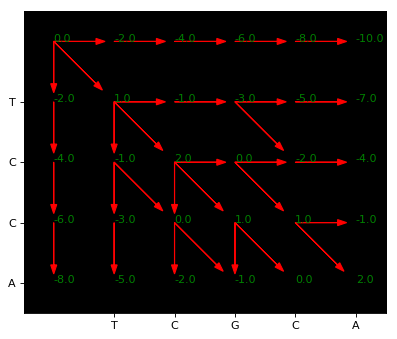

In [9]:
def plot_matrix(iseq1,iseq2,iscore_matrix,igraph,arrow_margin = 0.2,fig_constant=3,dpi=80):
    h,w = iscore_matrix.shape
    hk, wk = h*fig_constant,w*fig_constant
    fig = plt.figure(figsize=(wk,hk),dpi=dpi)
    plt.imshow(np.zeros_like(iscore_matrix),cmap="gray");
    for row in range(iscore_matrix.shape[0]):
        for col in range(iscore_matrix.shape[1]):
            plt.text(col,row,str(iscore_matrix[row,col]),color='green')
    for pair in igraph:
        orig,dest = pair
        dy = (dest[0]-orig[0])*(1-arrow_margin)
        dx = (dest[1]-orig[1])*(1-arrow_margin)
        plt.arrow(orig[1],orig[0],dx,dy,color="red",head_width=0.1)
    row_labels_pos = np.arange(1,len(iseq1))
    col_labels_pos = np.arange(1,len(iseq2))
    row_labels = [_ for _ in iseq1[1:]]
    col_labels = [_ for _ in iseq2[1:]]
    plt.xticks(col_labels_pos,col_labels)
    plt.yticks(row_labels_pos,row_labels)
    plt.show()

plot_matrix(seq1,seq2,score_matrix,graph,arrow_margin = 0.3,fig_constant=1,dpi=80)

Get the return path

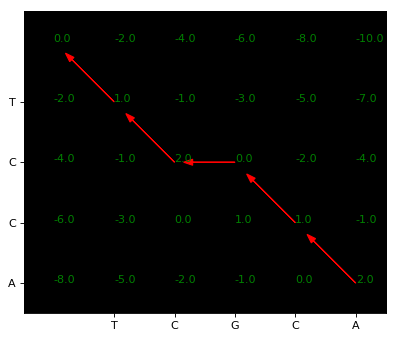

[[[4, 5], [3, 4]], [[3, 4], [2, 3]], [[2, 3], [2, 2]], [[2, 2], [1, 1]], [[1, 1], [0, 0]]]


In [10]:

last_point = [score_matrix.shape[0]-1,score_matrix.shape[1]-1]
way_back = []
iterx = 0
while True :
    for pair in graph:
        origin,dest = pair
        if dest == last_point:
            way_back.append([dest,origin])
            last_point = origin
    iterx+=1
    if (iterx==10) or (last_point == [0,0]):
        break

#Visualize
plot_matrix(seq1,seq2,score_matrix,way_back,arrow_margin = 0.3,fig_constant=1,dpi=80)

#See the nodes:
print(way_back)

Get the alignment

In [11]:
seq2o = ""
seq1o = ""
for pair in way_back:
    origin,dest = pair
    x1,y1 = dest[0],dest[1]
    x2,y2 = origin[0],origin[1]
    dx = x2-x1
    dy = y2-y1
    if dx == dy:
        seq2o = seq2[y2]+seq2o
        seq1o = seq1[x2]+seq1o
    else:
        if dx==0:
            seq2o = seq2[y2]+seq2o
            seq1o = "-"+seq1o
        if dy==0:
            seq2o = "-"+seq2o
            seq1o = seq1[x2+1]+seq1o

print(seq2o+"\n"+seq1o)

TCGCA
TC-CA
